In [198]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [199]:
data = np.loadtxt('/Users/chaitanyagupta/Desktop/machine-learning/Linear_Regression/ex1/ex1data2.txt', delimiter=',')

size = data[:, 0]

size_m = np.mean(size)
size_std = np.std(size)

size_norm = (size - np.mean(size)) / np.std(size)

beds = data[:, 1]

beds_m = np.mean(beds)
beds_std = np.std(beds)

beds_norm = (beds - np.mean(beds)) / np.std(beds)

y = data[:, 2]

m, n = size.shape[0], data.shape[1] - 1
    
x0 = np.ones(m)

X = np.c_[x0, size_norm, beds_norm]
X_unnorm = np.c_[x0, size, beds]

### Gradient Descent same as Univariate Linear Reg

In [200]:
def J(theta, X, y):
    
    # Calculate hypothesis
    hypothesis = np.dot(X, theta)
    
    # Calculate loss
    loss = hypothesis - y
    
    # Error
    error = 1/(2*m) * np.sum(loss ** 2) 
    
    return error
    
    
    
l_rate = 0.3
theta = np.zeros(n+1)

iters = 1500

print("Learining Rate: ", l_rate)
print("Initial theta: ", theta)

# Initial Error with theta init to 0
Jn = J(theta, X, y)
print("Initial Error: ", Jn)

error_pts = []
    
for i in range(iters):
    
    Jn = J(theta, X, y)
    error_pts.append(Jn)

    theta = theta - l_rate * (1/m) * np.dot((np.dot(X, theta) - y), X)
    
    

print("Final Error: ", Jn)
print("No of Iterations taken for conv: ", iters)
print("Parametrs: ", theta)

Learining Rate:  0.3
Initial theta:  [ 0.  0.  0.]
Initial Error:  65591548106.5
Final Error:  2043280050.6
No of Iterations taken for conv:  1500
Parametrs:  [ 340412.65957447  109447.79646964   -6578.35485416]


### Plotting Convergence

In [201]:
# Plot convergence of cost function

def plotConvergence(error_pts):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(error_pts)), error_pts, 'g-')
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")

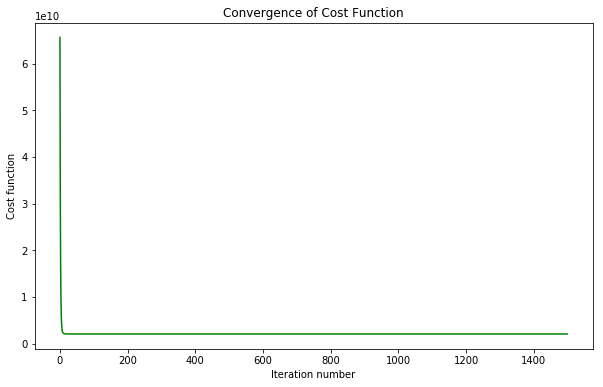

In [202]:
plotConvergence(error_pts)

In [203]:
y_pred = theta[0] + theta[1]*((1650 - size_m) / size_std) + theta[2]*((3 - beds_m) / beds_std)
y_pred

293081.46433489607

## Normal Equations

In [204]:
from numpy.linalg import inv

theta = np.dot(np.dot(inv(np.dot(X_unnorm.T, X)), X_unnorm.T), y)

In [205]:
theta

array([ 340412.65957447,  109447.79646964,   -6578.35485416])

In [206]:
y_pred_ne = theta[0] + theta[1]*((1650 - size_m) / size_std) + theta[2]*((3 - beds_m) / beds_std)
y_pred_ne

293081.46433489636